# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [2]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Extracting mnist: 100%|██████████| 60.0K/60.0K [00:26<00:00, 2.25KFile/s]


Extracting celeba...


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

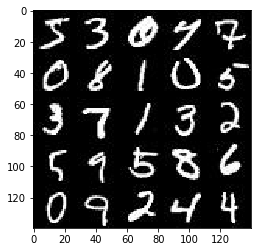

In [17]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

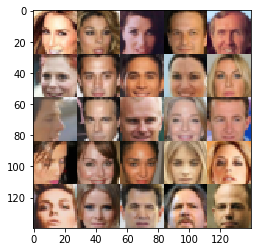

In [18]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [19]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0


/Users/macbook/anaconda/envs/face/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.
  


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [20]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_ = tf.placeholder(tf.float32, shape=(None, image_height, image_width, image_channels))
    input_z = tf.placeholder(tf.float32, shape=(None, z_dim))
    learning_rate = tf.placeholder(tf.float32, shape=())

    return input_, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [21]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha = 0.1
    init = tf.random_normal_initializer(stddev = 0.015)
    with tf.variable_scope('discriminator', reuse=reuse):
        # Shape of input is 28x28x3
        x = tf.layers.conv2d(images, 64, 5, strides=2, kernel_initializer=init, padding='same')
        x = lrelu(x, alpha)
        # 14x14x64
        
        x = tf.layers.conv2d(x, 128, 5, strides=2, kernel_initializer=init, padding='same')
        x = lrelu(x, alpha)
        x = tf.layers.batch_normalization(x, training=True)
        # 7x7x128
        
        x = tf.layers.conv2d(x, 256, 5, strides=2, kernel_initializer=init, padding='same')
        x = lrelu(x, alpha)
        x = tf.layers.batch_normalization(x, training=True)
        # 4x4x256
        
        # Flatten
        x = tf.reshape(x, (-1, 4 * 4 * 256))
        logits = tf.layers.dense(x, 1)
        output = tf.sigmoid(logits)

    return output, logits

def lrelu(x, alpha):
    return tf.maximum(x * alpha, x)

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [22]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha = 0.1
    init = tf.random_normal_initializer(stddev = 0.015)
    
    with tf.variable_scope('generator', reuse=(not is_train)):
        x = tf.layers.dense(z, 7 * 7 * 256)
        x = tf.reshape(x, (-1, 7, 7, 256))
        x = lrelu(x, alpha)
        x = tf.layers.batch_normalization(x, training=is_train)
        # 7x7x256
        
        x = tf.layers.conv2d_transpose(x, 128, 5, strides=2,
                                       kernel_initializer=init, padding='same')
        x = lrelu(x, alpha)
        x = tf.layers.batch_normalization(x, training=is_train)
        # 14x14x128
        
        x = tf.layers.conv2d_transpose(x, 64, 5, strides=2,
                                       kernel_initializer=init, padding='same')
        x = lrelu(x, alpha)
        x = tf.layers.batch_normalization(x, training=is_train)
        # 28x28x64
        
        logits = tf.layers.conv2d_transpose(x, out_channel_dim, 3, strides=1,
                                            kernel_initializer=init, padding='same')
        # 28x28x3
        
        output = tf.tanh(logits)
    
    return output


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [23]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim, is_train=True)
    d_output_real, d_logits_real = discriminator(input_real)
    d_output_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    smooth = 0.1
    labels_real = tf.ones_like(d_output_real) * (1 - smooth)
    labels_fake = tf.zeros_like(d_output_fake)
    g_labels = tf.ones_like(d_output_fake)

    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real,
                                                                         labels=labels_real))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake,
                                                                         labels=labels_fake))
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake,
                                                                    labels=g_labels))

    d_loss = d_loss_real + d_loss_fake
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [24]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    g_updates = [opt for opt in update_ops if opt.name.startswith('generator')]
    d_updates = [opt for opt in update_ops if opt.name.startswith('discriminator')]

    with tf.control_dependencies(g_updates):
        g_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1)
        g_opt = g_opt.minimize(g_loss, var_list=g_vars)

    with tf.control_dependencies(d_updates):
        d_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1)
        d_opt = d_opt.minimize(d_loss, var_list=d_vars)
            
    return d_opt, g_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [25]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [28]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    _, width, height, channels = data_shape
    input_real, input_z, _ = model_inputs(width, height, channels, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    steps = 0
    print_every = 10
    show_every = 100
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                batch_images *= 2.0
                
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z})

                if steps % print_every == 0:
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i + 1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % show_every == 0:
                    show_generator_output(sess, 25, input_z, channels, data_image_mode)
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.7635... Generator Loss: 1.3809
Epoch 1/2... Discriminator Loss: 0.5022... Generator Loss: 2.2556
Epoch 1/2... Discriminator Loss: 0.4379... Generator Loss: 3.1414
Epoch 1/2... Discriminator Loss: 0.5649... Generator Loss: 2.6950
Epoch 1/2... Discriminator Loss: 0.5805... Generator Loss: 3.5366
Epoch 1/2... Discriminator Loss: 0.3589... Generator Loss: 4.2892
Epoch 1/2... Discriminator Loss: 0.3576... Generator Loss: 4.5281
Epoch 1/2... Discriminator Loss: 0.3980... Generator Loss: 6.4053
Epoch 1/2... Discriminator Loss: 0.3524... Generator Loss: 5.0289
Epoch 1/2... Discriminator Loss: 0.3879... Generator Loss: 4.1072


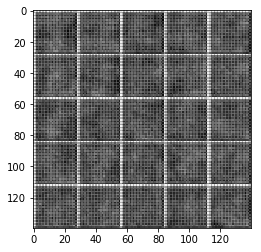

Epoch 1/2... Discriminator Loss: 0.3461... Generator Loss: 4.7425
Epoch 1/2... Discriminator Loss: 0.3675... Generator Loss: 4.8911
Epoch 1/2... Discriminator Loss: 0.3449... Generator Loss: 4.7168
Epoch 1/2... Discriminator Loss: 0.3602... Generator Loss: 5.0356
Epoch 1/2... Discriminator Loss: 0.3646... Generator Loss: 4.0508
Epoch 1/2... Discriminator Loss: 0.3802... Generator Loss: 4.0416
Epoch 1/2... Discriminator Loss: 0.3627... Generator Loss: 4.1763
Epoch 1/2... Discriminator Loss: 0.7225... Generator Loss: 2.3156
Epoch 1/2... Discriminator Loss: 0.3694... Generator Loss: 3.7905
Epoch 1/2... Discriminator Loss: 0.3765... Generator Loss: 3.9806


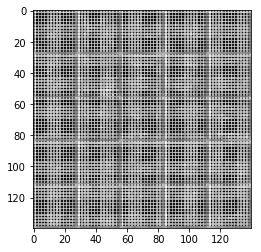

Epoch 1/2... Discriminator Loss: 1.1864... Generator Loss: 7.0419
Epoch 1/2... Discriminator Loss: 0.4136... Generator Loss: 3.2825
Epoch 1/2... Discriminator Loss: 0.4279... Generator Loss: 3.0640
Epoch 1/2... Discriminator Loss: 0.6616... Generator Loss: 1.5797
Epoch 1/2... Discriminator Loss: 0.3784... Generator Loss: 3.8688
Epoch 1/2... Discriminator Loss: 0.5051... Generator Loss: 2.9885
Epoch 1/2... Discriminator Loss: 0.6037... Generator Loss: 3.6491
Epoch 1/2... Discriminator Loss: 0.4832... Generator Loss: 2.3046
Epoch 1/2... Discriminator Loss: 0.4892... Generator Loss: 2.1727
Epoch 1/2... Discriminator Loss: 0.6287... Generator Loss: 2.1539


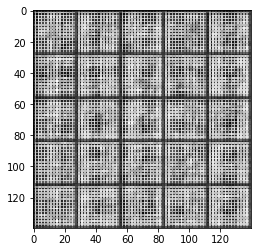

Epoch 1/2... Discriminator Loss: 0.5423... Generator Loss: 1.9942
Epoch 1/2... Discriminator Loss: 0.6307... Generator Loss: 2.4686
Epoch 1/2... Discriminator Loss: 0.5063... Generator Loss: 2.1544
Epoch 1/2... Discriminator Loss: 0.5363... Generator Loss: 1.9876
Epoch 1/2... Discriminator Loss: 0.4937... Generator Loss: 2.2736
Epoch 1/2... Discriminator Loss: 0.5693... Generator Loss: 2.0030
Epoch 1/2... Discriminator Loss: 0.5391... Generator Loss: 2.3298
Epoch 1/2... Discriminator Loss: 0.5979... Generator Loss: 3.6515
Epoch 1/2... Discriminator Loss: 0.7429... Generator Loss: 1.4676
Epoch 1/2... Discriminator Loss: 1.4148... Generator Loss: 0.5110


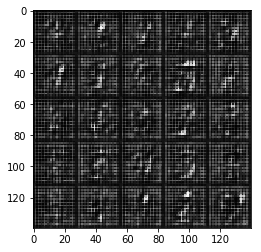

Epoch 1/2... Discriminator Loss: 0.5078... Generator Loss: 2.1911
Epoch 1/2... Discriminator Loss: 0.5421... Generator Loss: 2.4021
Epoch 1/2... Discriminator Loss: 0.5893... Generator Loss: 1.7978
Epoch 1/2... Discriminator Loss: 0.7068... Generator Loss: 1.3770
Epoch 1/2... Discriminator Loss: 0.5076... Generator Loss: 2.3232
Epoch 1/2... Discriminator Loss: 0.5625... Generator Loss: 1.9408
Epoch 1/2... Discriminator Loss: 0.6533... Generator Loss: 1.6110
Epoch 1/2... Discriminator Loss: 0.5224... Generator Loss: 2.1162
Epoch 1/2... Discriminator Loss: 0.5740... Generator Loss: 2.2763
Epoch 1/2... Discriminator Loss: 0.4876... Generator Loss: 2.3955


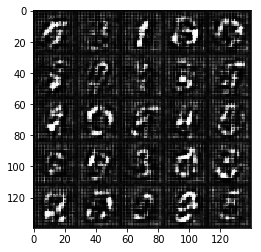

Epoch 1/2... Discriminator Loss: 0.5464... Generator Loss: 2.0075
Epoch 1/2... Discriminator Loss: 0.6833... Generator Loss: 2.7689
Epoch 1/2... Discriminator Loss: 0.6191... Generator Loss: 2.8923
Epoch 1/2... Discriminator Loss: 0.4781... Generator Loss: 2.5536
Epoch 1/2... Discriminator Loss: 0.4941... Generator Loss: 2.5970
Epoch 1/2... Discriminator Loss: 0.9836... Generator Loss: 1.0544
Epoch 1/2... Discriminator Loss: 0.5832... Generator Loss: 2.0723
Epoch 1/2... Discriminator Loss: 0.5699... Generator Loss: 1.9445
Epoch 1/2... Discriminator Loss: 0.4924... Generator Loss: 2.6758
Epoch 1/2... Discriminator Loss: 0.4863... Generator Loss: 2.5734


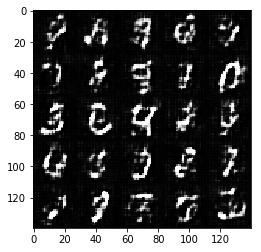

Epoch 1/2... Discriminator Loss: 0.5571... Generator Loss: 2.1841
Epoch 1/2... Discriminator Loss: 0.5657... Generator Loss: 2.1330
Epoch 1/2... Discriminator Loss: 0.6088... Generator Loss: 1.7883
Epoch 1/2... Discriminator Loss: 0.6262... Generator Loss: 1.7803
Epoch 1/2... Discriminator Loss: 0.7430... Generator Loss: 1.4231
Epoch 1/2... Discriminator Loss: 0.7816... Generator Loss: 1.3369
Epoch 1/2... Discriminator Loss: 0.7273... Generator Loss: 1.4094
Epoch 1/2... Discriminator Loss: 0.8677... Generator Loss: 1.1597
Epoch 1/2... Discriminator Loss: 0.6805... Generator Loss: 1.6545
Epoch 1/2... Discriminator Loss: 0.7107... Generator Loss: 1.7423


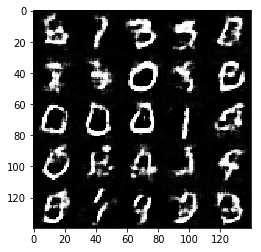

Epoch 1/2... Discriminator Loss: 2.0464... Generator Loss: 0.3976
Epoch 1/2... Discriminator Loss: 0.7528... Generator Loss: 1.3982
Epoch 1/2... Discriminator Loss: 0.6727... Generator Loss: 1.6924
Epoch 1/2... Discriminator Loss: 0.7564... Generator Loss: 1.4016
Epoch 1/2... Discriminator Loss: 0.8424... Generator Loss: 2.7098
Epoch 1/2... Discriminator Loss: 0.6402... Generator Loss: 1.9041
Epoch 1/2... Discriminator Loss: 0.8180... Generator Loss: 2.6336
Epoch 1/2... Discriminator Loss: 0.9513... Generator Loss: 0.9903
Epoch 1/2... Discriminator Loss: 0.7362... Generator Loss: 1.4475
Epoch 1/2... Discriminator Loss: 0.8316... Generator Loss: 1.2635


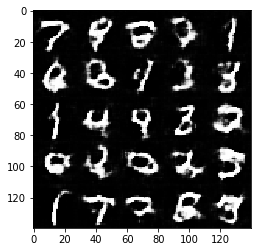

Epoch 1/2... Discriminator Loss: 0.8422... Generator Loss: 1.1650
Epoch 1/2... Discriminator Loss: 0.7405... Generator Loss: 1.4550
Epoch 1/2... Discriminator Loss: 0.6984... Generator Loss: 1.4816
Epoch 1/2... Discriminator Loss: 0.5316... Generator Loss: 2.1992
Epoch 1/2... Discriminator Loss: 0.6310... Generator Loss: 2.4414
Epoch 1/2... Discriminator Loss: 0.8934... Generator Loss: 1.8359
Epoch 1/2... Discriminator Loss: 0.9132... Generator Loss: 1.2199
Epoch 1/2... Discriminator Loss: 0.7695... Generator Loss: 1.3478
Epoch 1/2... Discriminator Loss: 0.7358... Generator Loss: 1.9709
Epoch 1/2... Discriminator Loss: 0.6708... Generator Loss: 1.8248


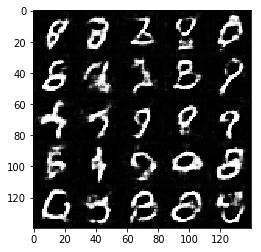

Epoch 1/2... Discriminator Loss: 0.7923... Generator Loss: 1.2767
Epoch 1/2... Discriminator Loss: 0.6622... Generator Loss: 1.6545
Epoch 1/2... Discriminator Loss: 0.8714... Generator Loss: 1.1694
Epoch 2/2... Discriminator Loss: 0.9521... Generator Loss: 0.9780
Epoch 2/2... Discriminator Loss: 0.6759... Generator Loss: 1.6027
Epoch 2/2... Discriminator Loss: 0.7528... Generator Loss: 1.4004
Epoch 2/2... Discriminator Loss: 0.8619... Generator Loss: 1.2010
Epoch 2/2... Discriminator Loss: 0.8521... Generator Loss: 1.7591
Epoch 2/2... Discriminator Loss: 0.9803... Generator Loss: 2.6045
Epoch 2/2... Discriminator Loss: 0.7529... Generator Loss: 1.9713


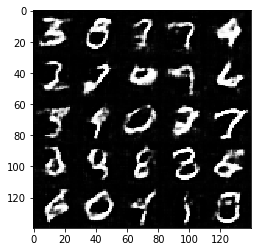

Epoch 2/2... Discriminator Loss: 0.7593... Generator Loss: 2.1569
Epoch 2/2... Discriminator Loss: 0.6556... Generator Loss: 1.7461
Epoch 2/2... Discriminator Loss: 0.7118... Generator Loss: 1.5578
Epoch 2/2... Discriminator Loss: 0.8460... Generator Loss: 1.1810
Epoch 2/2... Discriminator Loss: 0.6620... Generator Loss: 1.6816
Epoch 2/2... Discriminator Loss: 0.6705... Generator Loss: 2.1244
Epoch 2/2... Discriminator Loss: 0.6704... Generator Loss: 1.7628
Epoch 2/2... Discriminator Loss: 0.7315... Generator Loss: 1.4463
Epoch 2/2... Discriminator Loss: 0.7127... Generator Loss: 1.8566
Epoch 2/2... Discriminator Loss: 0.9228... Generator Loss: 1.0709


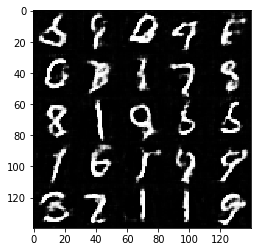

Epoch 2/2... Discriminator Loss: 0.6840... Generator Loss: 1.7875
Epoch 2/2... Discriminator Loss: 0.6734... Generator Loss: 2.1033
Epoch 2/2... Discriminator Loss: 0.6682... Generator Loss: 1.6137
Epoch 2/2... Discriminator Loss: 0.7637... Generator Loss: 1.4827
Epoch 2/2... Discriminator Loss: 0.7370... Generator Loss: 1.7175
Epoch 2/2... Discriminator Loss: 0.8045... Generator Loss: 1.9467
Epoch 2/2... Discriminator Loss: 0.7995... Generator Loss: 1.2746
Epoch 2/2... Discriminator Loss: 1.0376... Generator Loss: 0.9753
Epoch 2/2... Discriminator Loss: 0.6679... Generator Loss: 1.8187
Epoch 2/2... Discriminator Loss: 0.6970... Generator Loss: 1.7612


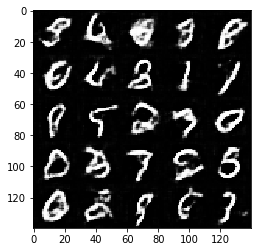

Epoch 2/2... Discriminator Loss: 0.6741... Generator Loss: 2.0462
Epoch 2/2... Discriminator Loss: 0.6773... Generator Loss: 2.1509
Epoch 2/2... Discriminator Loss: 0.7270... Generator Loss: 1.8213
Epoch 2/2... Discriminator Loss: 0.7550... Generator Loss: 1.4258
Epoch 2/2... Discriminator Loss: 0.8685... Generator Loss: 2.0922
Epoch 2/2... Discriminator Loss: 0.7556... Generator Loss: 2.2333
Epoch 2/2... Discriminator Loss: 0.8649... Generator Loss: 1.2098
Epoch 2/2... Discriminator Loss: 0.9777... Generator Loss: 1.0057
Epoch 2/2... Discriminator Loss: 1.2079... Generator Loss: 2.9470
Epoch 2/2... Discriminator Loss: 0.7751... Generator Loss: 1.5446


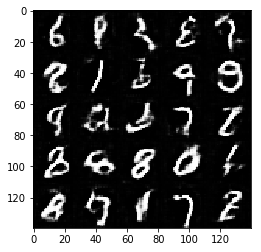

Epoch 2/2... Discriminator Loss: 0.6366... Generator Loss: 1.8474
Epoch 2/2... Discriminator Loss: 0.8715... Generator Loss: 1.2968
Epoch 2/2... Discriminator Loss: 0.6608... Generator Loss: 1.9364
Epoch 2/2... Discriminator Loss: 0.6759... Generator Loss: 1.6405
Epoch 2/2... Discriminator Loss: 0.9542... Generator Loss: 1.0532
Epoch 2/2... Discriminator Loss: 0.7896... Generator Loss: 1.3526
Epoch 2/2... Discriminator Loss: 0.7632... Generator Loss: 2.1215
Epoch 2/2... Discriminator Loss: 0.6966... Generator Loss: 1.8386
Epoch 2/2... Discriminator Loss: 0.6707... Generator Loss: 2.0755
Epoch 2/2... Discriminator Loss: 0.8097... Generator Loss: 1.7959


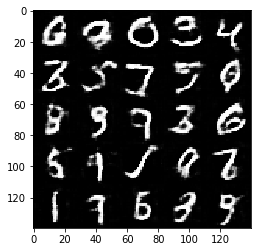

Epoch 2/2... Discriminator Loss: 0.7041... Generator Loss: 1.7528
Epoch 2/2... Discriminator Loss: 0.9630... Generator Loss: 0.9716
Epoch 2/2... Discriminator Loss: 0.9070... Generator Loss: 1.0551
Epoch 2/2... Discriminator Loss: 0.5858... Generator Loss: 1.8829
Epoch 2/2... Discriminator Loss: 0.7405... Generator Loss: 1.4615
Epoch 2/2... Discriminator Loss: 0.6477... Generator Loss: 2.0195
Epoch 2/2... Discriminator Loss: 0.7516... Generator Loss: 1.3326
Epoch 2/2... Discriminator Loss: 0.7272... Generator Loss: 1.6322
Epoch 2/2... Discriminator Loss: 0.6493... Generator Loss: 1.7141
Epoch 2/2... Discriminator Loss: 0.6623... Generator Loss: 1.7736


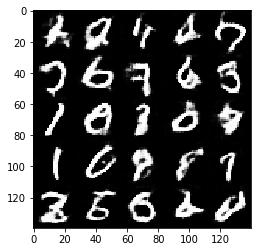

Epoch 2/2... Discriminator Loss: 1.1334... Generator Loss: 0.8073
Epoch 2/2... Discriminator Loss: 0.7183... Generator Loss: 1.3682
Epoch 2/2... Discriminator Loss: 0.5896... Generator Loss: 2.1458
Epoch 2/2... Discriminator Loss: 0.5648... Generator Loss: 2.2482
Epoch 2/2... Discriminator Loss: 0.8962... Generator Loss: 1.0158
Epoch 2/2... Discriminator Loss: 0.8482... Generator Loss: 2.5741
Epoch 2/2... Discriminator Loss: 0.8025... Generator Loss: 1.3986
Epoch 2/2... Discriminator Loss: 0.6611... Generator Loss: 1.5419
Epoch 2/2... Discriminator Loss: 0.9291... Generator Loss: 1.0520
Epoch 2/2... Discriminator Loss: 0.7027... Generator Loss: 1.9265


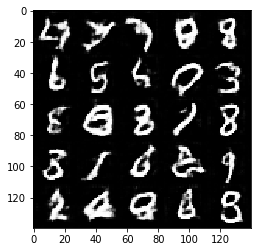

Epoch 2/2... Discriminator Loss: 1.0042... Generator Loss: 0.9420
Epoch 2/2... Discriminator Loss: 0.7124... Generator Loss: 1.7415
Epoch 2/2... Discriminator Loss: 0.7721... Generator Loss: 1.4936
Epoch 2/2... Discriminator Loss: 0.7561... Generator Loss: 1.5611
Epoch 2/2... Discriminator Loss: 0.6912... Generator Loss: 1.8604
Epoch 2/2... Discriminator Loss: 0.6808... Generator Loss: 1.6797
Epoch 2/2... Discriminator Loss: 0.6695... Generator Loss: 1.9651
Epoch 2/2... Discriminator Loss: 0.7168... Generator Loss: 2.1974
Epoch 2/2... Discriminator Loss: 0.6981... Generator Loss: 1.4112
Epoch 2/2... Discriminator Loss: 1.2280... Generator Loss: 0.6851


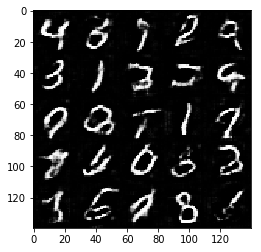

Epoch 2/2... Discriminator Loss: 0.7244... Generator Loss: 1.4895
Epoch 2/2... Discriminator Loss: 0.8778... Generator Loss: 1.0587
Epoch 2/2... Discriminator Loss: 0.9270... Generator Loss: 1.0522
Epoch 2/2... Discriminator Loss: 0.7519... Generator Loss: 1.4070
Epoch 2/2... Discriminator Loss: 0.6721... Generator Loss: 1.5942
Epoch 2/2... Discriminator Loss: 0.6774... Generator Loss: 1.8052
Epoch 2/2... Discriminator Loss: 0.6755... Generator Loss: 1.7202
Epoch 2/2... Discriminator Loss: 0.7341... Generator Loss: 2.0717
Epoch 2/2... Discriminator Loss: 0.6375... Generator Loss: 2.5913
Epoch 2/2... Discriminator Loss: 0.6824... Generator Loss: 2.3287


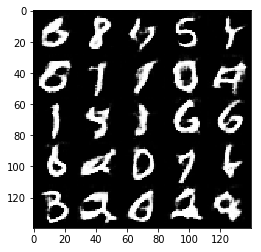

Epoch 2/2... Discriminator Loss: 0.9937... Generator Loss: 0.9298
Epoch 2/2... Discriminator Loss: 1.0478... Generator Loss: 0.8595
Epoch 2/2... Discriminator Loss: 0.7369... Generator Loss: 1.3851
Epoch 2/2... Discriminator Loss: 0.8512... Generator Loss: 1.6581
Epoch 2/2... Discriminator Loss: 0.8550... Generator Loss: 1.6470
Epoch 2/2... Discriminator Loss: 0.8071... Generator Loss: 1.2795
Epoch 2/2... Discriminator Loss: 0.7172... Generator Loss: 1.4675


In [29]:
batch_size = 64
z_dim = 100
learning_rate = 0.0001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 2.6739... Generator Loss: 0.2273
Epoch 1/1... Discriminator Loss: 1.7507... Generator Loss: 0.4480
Epoch 1/1... Discriminator Loss: 1.7435... Generator Loss: 0.4821
Epoch 1/1... Discriminator Loss: 1.8954... Generator Loss: 0.3779
Epoch 1/1... Discriminator Loss: 1.5200... Generator Loss: 0.7358
Epoch 1/1... Discriminator Loss: 0.4370... Generator Loss: 3.1313
Epoch 1/1... Discriminator Loss: 1.1079... Generator Loss: 6.7942
Epoch 1/1... Discriminator Loss: 0.4451... Generator Loss: 3.6516
Epoch 1/1... Discriminator Loss: 0.6658... Generator Loss: 2.5911
Epoch 1/1... Discriminator Loss: 3.1613... Generator Loss: 7.9638


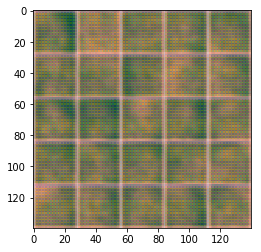

Epoch 1/1... Discriminator Loss: 2.1082... Generator Loss: 0.2963
Epoch 1/1... Discriminator Loss: 0.7915... Generator Loss: 1.7361
Epoch 1/1... Discriminator Loss: 0.7154... Generator Loss: 2.1381
Epoch 1/1... Discriminator Loss: 3.1227... Generator Loss: 0.1018
Epoch 1/1... Discriminator Loss: 1.2810... Generator Loss: 0.6817
Epoch 1/1... Discriminator Loss: 0.8371... Generator Loss: 1.3105
Epoch 1/1... Discriminator Loss: 2.1367... Generator Loss: 0.2301
Epoch 1/1... Discriminator Loss: 1.0180... Generator Loss: 1.5974
Epoch 1/1... Discriminator Loss: 0.7694... Generator Loss: 2.1376
Epoch 1/1... Discriminator Loss: 0.9370... Generator Loss: 1.5366


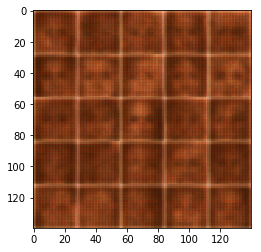

Epoch 1/1... Discriminator Loss: 0.8235... Generator Loss: 1.6175
Epoch 1/1... Discriminator Loss: 0.9910... Generator Loss: 1.0980
Epoch 1/1... Discriminator Loss: 2.1118... Generator Loss: 0.2412
Epoch 1/1... Discriminator Loss: 0.8768... Generator Loss: 1.2961
Epoch 1/1... Discriminator Loss: 1.2586... Generator Loss: 0.8306
Epoch 1/1... Discriminator Loss: 0.9283... Generator Loss: 1.2623
Epoch 1/1... Discriminator Loss: 0.8317... Generator Loss: 2.6249
Epoch 1/1... Discriminator Loss: 1.6402... Generator Loss: 0.3821
Epoch 1/1... Discriminator Loss: 1.1508... Generator Loss: 0.7542
Epoch 1/1... Discriminator Loss: 0.8526... Generator Loss: 1.9106


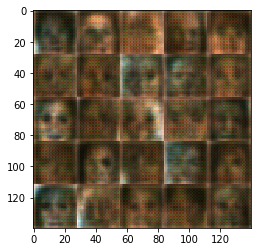

Epoch 1/1... Discriminator Loss: 1.4279... Generator Loss: 0.6625
Epoch 1/1... Discriminator Loss: 1.2784... Generator Loss: 0.7845
Epoch 1/1... Discriminator Loss: 0.9677... Generator Loss: 1.6316
Epoch 1/1... Discriminator Loss: 1.4877... Generator Loss: 0.4750
Epoch 1/1... Discriminator Loss: 1.0190... Generator Loss: 1.6003
Epoch 1/1... Discriminator Loss: 1.4093... Generator Loss: 0.6367
Epoch 1/1... Discriminator Loss: 1.7056... Generator Loss: 0.4082
Epoch 1/1... Discriminator Loss: 1.3304... Generator Loss: 0.7461
Epoch 1/1... Discriminator Loss: 1.4538... Generator Loss: 0.6237
Epoch 1/1... Discriminator Loss: 1.7522... Generator Loss: 0.3870


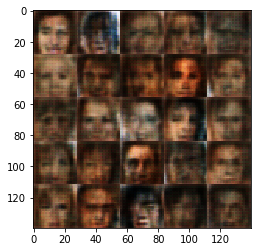

Epoch 1/1... Discriminator Loss: 1.2495... Generator Loss: 0.8290
Epoch 1/1... Discriminator Loss: 1.2852... Generator Loss: 1.3827
Epoch 1/1... Discriminator Loss: 1.2555... Generator Loss: 0.6875
Epoch 1/1... Discriminator Loss: 1.3140... Generator Loss: 0.7109
Epoch 1/1... Discriminator Loss: 1.5783... Generator Loss: 0.6165
Epoch 1/1... Discriminator Loss: 1.1239... Generator Loss: 0.9887
Epoch 1/1... Discriminator Loss: 1.4057... Generator Loss: 0.5240
Epoch 1/1... Discriminator Loss: 1.5452... Generator Loss: 0.4568
Epoch 1/1... Discriminator Loss: 1.3111... Generator Loss: 0.7424
Epoch 1/1... Discriminator Loss: 1.2200... Generator Loss: 0.8792


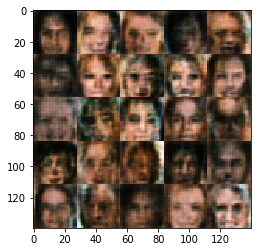

Epoch 1/1... Discriminator Loss: 1.4120... Generator Loss: 0.5841
Epoch 1/1... Discriminator Loss: 1.2863... Generator Loss: 0.7178
Epoch 1/1... Discriminator Loss: 1.1566... Generator Loss: 0.7154
Epoch 1/1... Discriminator Loss: 1.0721... Generator Loss: 0.9731
Epoch 1/1... Discriminator Loss: 1.3059... Generator Loss: 0.7498
Epoch 1/1... Discriminator Loss: 1.1675... Generator Loss: 0.7867
Epoch 1/1... Discriminator Loss: 1.5235... Generator Loss: 0.4860
Epoch 1/1... Discriminator Loss: 0.9576... Generator Loss: 1.1184
Epoch 1/1... Discriminator Loss: 1.2003... Generator Loss: 0.8321
Epoch 1/1... Discriminator Loss: 1.3719... Generator Loss: 0.5169


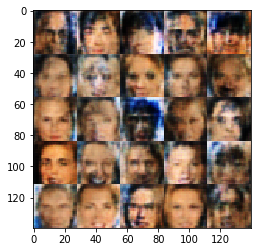

Epoch 1/1... Discriminator Loss: 1.7135... Generator Loss: 0.3547
Epoch 1/1... Discriminator Loss: 1.1798... Generator Loss: 0.7882
Epoch 1/1... Discriminator Loss: 1.1561... Generator Loss: 1.1295
Epoch 1/1... Discriminator Loss: 1.2796... Generator Loss: 0.7988
Epoch 1/1... Discriminator Loss: 1.2484... Generator Loss: 0.8289
Epoch 1/1... Discriminator Loss: 1.1967... Generator Loss: 0.9213
Epoch 1/1... Discriminator Loss: 1.1242... Generator Loss: 1.5986
Epoch 1/1... Discriminator Loss: 1.2443... Generator Loss: 0.6912
Epoch 1/1... Discriminator Loss: 1.2748... Generator Loss: 0.7421
Epoch 1/1... Discriminator Loss: 1.4808... Generator Loss: 0.4588


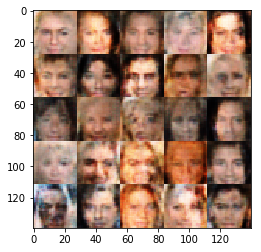

Epoch 1/1... Discriminator Loss: 1.2753... Generator Loss: 0.8309
Epoch 1/1... Discriminator Loss: 1.2801... Generator Loss: 0.6857
Epoch 1/1... Discriminator Loss: 1.2223... Generator Loss: 0.7095
Epoch 1/1... Discriminator Loss: 1.2663... Generator Loss: 0.6767
Epoch 1/1... Discriminator Loss: 1.1737... Generator Loss: 0.8166
Epoch 1/1... Discriminator Loss: 1.1836... Generator Loss: 0.7636
Epoch 1/1... Discriminator Loss: 1.0535... Generator Loss: 1.0015
Epoch 1/1... Discriminator Loss: 0.9985... Generator Loss: 1.0061
Epoch 1/1... Discriminator Loss: 1.2400... Generator Loss: 0.6585
Epoch 1/1... Discriminator Loss: 1.0850... Generator Loss: 1.0169


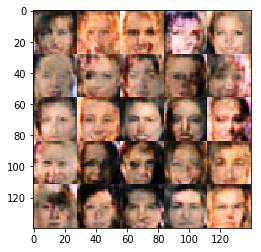

Epoch 1/1... Discriminator Loss: 1.2713... Generator Loss: 0.6290
Epoch 1/1... Discriminator Loss: 1.5746... Generator Loss: 0.4404
Epoch 1/1... Discriminator Loss: 1.2726... Generator Loss: 0.6119
Epoch 1/1... Discriminator Loss: 1.1499... Generator Loss: 0.9078
Epoch 1/1... Discriminator Loss: 1.0772... Generator Loss: 1.5603
Epoch 1/1... Discriminator Loss: 1.3405... Generator Loss: 0.5910
Epoch 1/1... Discriminator Loss: 1.1519... Generator Loss: 1.6931
Epoch 1/1... Discriminator Loss: 1.2728... Generator Loss: 0.7109
Epoch 1/1... Discriminator Loss: 1.2136... Generator Loss: 0.8256
Epoch 1/1... Discriminator Loss: 1.1338... Generator Loss: 0.7925


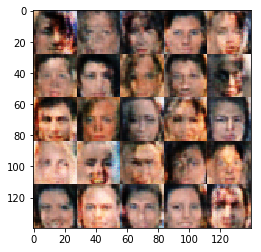

Epoch 1/1... Discriminator Loss: 1.2513... Generator Loss: 0.6384
Epoch 1/1... Discriminator Loss: 1.3263... Generator Loss: 0.5424
Epoch 1/1... Discriminator Loss: 1.2332... Generator Loss: 0.8218
Epoch 1/1... Discriminator Loss: 1.0306... Generator Loss: 0.8602
Epoch 1/1... Discriminator Loss: 0.9763... Generator Loss: 1.0798
Epoch 1/1... Discriminator Loss: 1.1579... Generator Loss: 0.8426
Epoch 1/1... Discriminator Loss: 1.2402... Generator Loss: 0.7684
Epoch 1/1... Discriminator Loss: 1.5454... Generator Loss: 0.4593
Epoch 1/1... Discriminator Loss: 1.0171... Generator Loss: 0.8845
Epoch 1/1... Discriminator Loss: 1.3107... Generator Loss: 0.7829


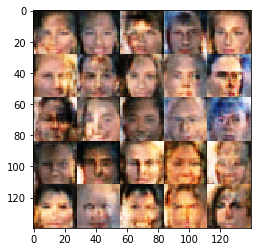

Epoch 1/1... Discriminator Loss: 1.3248... Generator Loss: 1.5037
Epoch 1/1... Discriminator Loss: 1.3492... Generator Loss: 0.7672
Epoch 1/1... Discriminator Loss: 1.2529... Generator Loss: 0.7218
Epoch 1/1... Discriminator Loss: 1.0011... Generator Loss: 1.0805
Epoch 1/1... Discriminator Loss: 1.0294... Generator Loss: 0.9421
Epoch 1/1... Discriminator Loss: 1.4050... Generator Loss: 0.8383
Epoch 1/1... Discriminator Loss: 1.0736... Generator Loss: 0.9634
Epoch 1/1... Discriminator Loss: 1.3758... Generator Loss: 0.5478
Epoch 1/1... Discriminator Loss: 1.3436... Generator Loss: 0.5615
Epoch 1/1... Discriminator Loss: 0.9938... Generator Loss: 0.9066


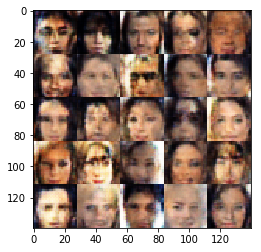

Epoch 1/1... Discriminator Loss: 1.5629... Generator Loss: 0.4556
Epoch 1/1... Discriminator Loss: 1.3110... Generator Loss: 0.6322
Epoch 1/1... Discriminator Loss: 1.0846... Generator Loss: 1.7101
Epoch 1/1... Discriminator Loss: 1.5366... Generator Loss: 0.5306
Epoch 1/1... Discriminator Loss: 1.1960... Generator Loss: 0.6887
Epoch 1/1... Discriminator Loss: 1.2982... Generator Loss: 0.6442
Epoch 1/1... Discriminator Loss: 1.4288... Generator Loss: 0.4920
Epoch 1/1... Discriminator Loss: 1.0885... Generator Loss: 0.8157
Epoch 1/1... Discriminator Loss: 1.3511... Generator Loss: 0.6008
Epoch 1/1... Discriminator Loss: 1.1653... Generator Loss: 0.7183


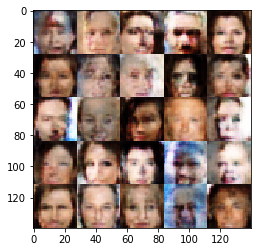

Epoch 1/1... Discriminator Loss: 1.3360... Generator Loss: 0.6091
Epoch 1/1... Discriminator Loss: 1.1772... Generator Loss: 0.8410
Epoch 1/1... Discriminator Loss: 1.1684... Generator Loss: 0.7366
Epoch 1/1... Discriminator Loss: 1.4054... Generator Loss: 0.5601
Epoch 1/1... Discriminator Loss: 1.2504... Generator Loss: 0.6623
Epoch 1/1... Discriminator Loss: 1.0560... Generator Loss: 1.4988
Epoch 1/1... Discriminator Loss: 1.1501... Generator Loss: 0.9523
Epoch 1/1... Discriminator Loss: 1.2931... Generator Loss: 0.6289
Epoch 1/1... Discriminator Loss: 1.3531... Generator Loss: 0.6511
Epoch 1/1... Discriminator Loss: 1.4403... Generator Loss: 0.5107


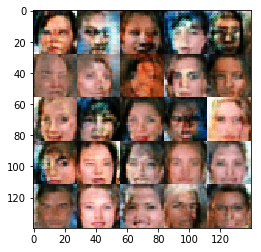

Epoch 1/1... Discriminator Loss: 1.1878... Generator Loss: 0.7899
Epoch 1/1... Discriminator Loss: 0.9941... Generator Loss: 1.3590
Epoch 1/1... Discriminator Loss: 0.9103... Generator Loss: 1.2288
Epoch 1/1... Discriminator Loss: 1.4782... Generator Loss: 1.0339
Epoch 1/1... Discriminator Loss: 1.2061... Generator Loss: 0.6427
Epoch 1/1... Discriminator Loss: 1.2609... Generator Loss: 1.0749
Epoch 1/1... Discriminator Loss: 1.3988... Generator Loss: 0.5553
Epoch 1/1... Discriminator Loss: 1.1702... Generator Loss: 0.6796
Epoch 1/1... Discriminator Loss: 1.2290... Generator Loss: 0.6878
Epoch 1/1... Discriminator Loss: 1.6116... Generator Loss: 0.4026


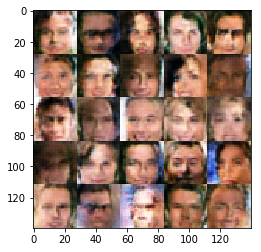

Epoch 1/1... Discriminator Loss: 1.1248... Generator Loss: 0.9179
Epoch 1/1... Discriminator Loss: 1.7005... Generator Loss: 0.3894
Epoch 1/1... Discriminator Loss: 1.1040... Generator Loss: 0.9649
Epoch 1/1... Discriminator Loss: 1.1925... Generator Loss: 0.7355
Epoch 1/1... Discriminator Loss: 1.3342... Generator Loss: 0.6075
Epoch 1/1... Discriminator Loss: 1.4551... Generator Loss: 0.5797
Epoch 1/1... Discriminator Loss: 1.3499... Generator Loss: 0.5597
Epoch 1/1... Discriminator Loss: 1.1692... Generator Loss: 0.7661
Epoch 1/1... Discriminator Loss: 1.1845... Generator Loss: 0.7206
Epoch 1/1... Discriminator Loss: 1.2113... Generator Loss: 0.6988


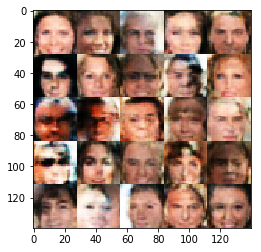

Epoch 1/1... Discriminator Loss: 1.0232... Generator Loss: 1.0456
Epoch 1/1... Discriminator Loss: 1.8022... Generator Loss: 0.3475
Epoch 1/1... Discriminator Loss: 1.6204... Generator Loss: 0.4026
Epoch 1/1... Discriminator Loss: 1.3152... Generator Loss: 0.6128
Epoch 1/1... Discriminator Loss: 1.4927... Generator Loss: 0.4806
Epoch 1/1... Discriminator Loss: 1.1985... Generator Loss: 0.9247
Epoch 1/1... Discriminator Loss: 0.9939... Generator Loss: 1.2547
Epoch 1/1... Discriminator Loss: 1.3005... Generator Loss: 0.6793
Epoch 1/1... Discriminator Loss: 1.3205... Generator Loss: 0.6000
Epoch 1/1... Discriminator Loss: 1.6684... Generator Loss: 0.3890


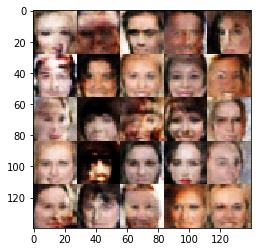

Epoch 1/1... Discriminator Loss: 1.6223... Generator Loss: 0.3930
Epoch 1/1... Discriminator Loss: 1.2704... Generator Loss: 0.6882
Epoch 1/1... Discriminator Loss: 1.1036... Generator Loss: 0.8819
Epoch 1/1... Discriminator Loss: 1.4140... Generator Loss: 0.6702
Epoch 1/1... Discriminator Loss: 1.3552... Generator Loss: 0.5958
Epoch 1/1... Discriminator Loss: 1.2940... Generator Loss: 0.6056
Epoch 1/1... Discriminator Loss: 1.3023... Generator Loss: 0.6595
Epoch 1/1... Discriminator Loss: 1.6967... Generator Loss: 0.3845
Epoch 1/1... Discriminator Loss: 1.4443... Generator Loss: 0.4810
Epoch 1/1... Discriminator Loss: 1.3644... Generator Loss: 0.5460


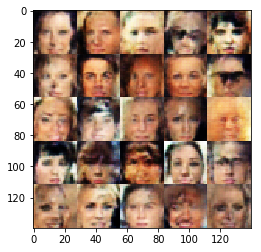

Epoch 1/1... Discriminator Loss: 1.1087... Generator Loss: 0.8473
Epoch 1/1... Discriminator Loss: 1.6402... Generator Loss: 0.3776
Epoch 1/1... Discriminator Loss: 1.3953... Generator Loss: 0.6155
Epoch 1/1... Discriminator Loss: 1.3878... Generator Loss: 0.6648
Epoch 1/1... Discriminator Loss: 1.2354... Generator Loss: 0.9283
Epoch 1/1... Discriminator Loss: 1.2559... Generator Loss: 0.7100
Epoch 1/1... Discriminator Loss: 1.4500... Generator Loss: 0.4581
Epoch 1/1... Discriminator Loss: 1.2187... Generator Loss: 0.6944
Epoch 1/1... Discriminator Loss: 1.1192... Generator Loss: 0.7570
Epoch 1/1... Discriminator Loss: 1.2949... Generator Loss: 0.5817


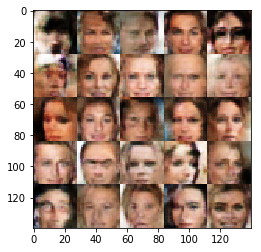

Epoch 1/1... Discriminator Loss: 1.1808... Generator Loss: 0.7635
Epoch 1/1... Discriminator Loss: 1.3374... Generator Loss: 0.6135
Epoch 1/1... Discriminator Loss: 0.9063... Generator Loss: 1.2582
Epoch 1/1... Discriminator Loss: 1.3599... Generator Loss: 0.8204
Epoch 1/1... Discriminator Loss: 1.0948... Generator Loss: 0.9719
Epoch 1/1... Discriminator Loss: 1.3307... Generator Loss: 1.6493
Epoch 1/1... Discriminator Loss: 1.0316... Generator Loss: 1.0354
Epoch 1/1... Discriminator Loss: 1.0722... Generator Loss: 1.0277
Epoch 1/1... Discriminator Loss: 1.3752... Generator Loss: 0.6359
Epoch 1/1... Discriminator Loss: 1.2035... Generator Loss: 0.7058


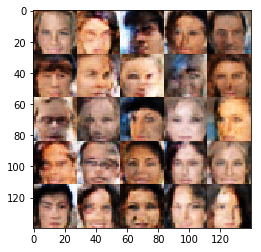

Epoch 1/1... Discriminator Loss: 1.3045... Generator Loss: 0.6400
Epoch 1/1... Discriminator Loss: 1.0849... Generator Loss: 1.2278
Epoch 1/1... Discriminator Loss: 1.2178... Generator Loss: 0.7011
Epoch 1/1... Discriminator Loss: 0.9449... Generator Loss: 1.0316
Epoch 1/1... Discriminator Loss: 1.5473... Generator Loss: 0.4514
Epoch 1/1... Discriminator Loss: 1.0263... Generator Loss: 0.9753
Epoch 1/1... Discriminator Loss: 0.9620... Generator Loss: 1.4397
Epoch 1/1... Discriminator Loss: 1.0782... Generator Loss: 1.0065
Epoch 1/1... Discriminator Loss: 1.2598... Generator Loss: 0.6950
Epoch 1/1... Discriminator Loss: 1.0006... Generator Loss: 1.2921


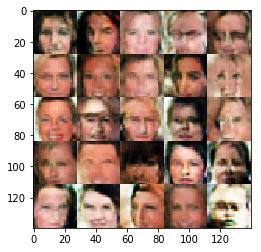

Epoch 1/1... Discriminator Loss: 1.2723... Generator Loss: 0.7950
Epoch 1/1... Discriminator Loss: 1.1323... Generator Loss: 0.9677
Epoch 1/1... Discriminator Loss: 1.4040... Generator Loss: 0.5155
Epoch 1/1... Discriminator Loss: 1.1279... Generator Loss: 0.7957
Epoch 1/1... Discriminator Loss: 1.4370... Generator Loss: 0.5499
Epoch 1/1... Discriminator Loss: 1.1895... Generator Loss: 0.7851
Epoch 1/1... Discriminator Loss: 1.0511... Generator Loss: 1.2983
Epoch 1/1... Discriminator Loss: 1.3382... Generator Loss: 0.5932
Epoch 1/1... Discriminator Loss: 1.4607... Generator Loss: 0.7184
Epoch 1/1... Discriminator Loss: 1.5595... Generator Loss: 0.4302


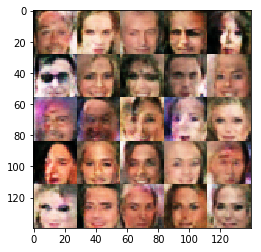

Epoch 1/1... Discriminator Loss: 1.4973... Generator Loss: 0.5344
Epoch 1/1... Discriminator Loss: 1.6011... Generator Loss: 0.5177
Epoch 1/1... Discriminator Loss: 1.1927... Generator Loss: 1.0517
Epoch 1/1... Discriminator Loss: 1.3982... Generator Loss: 1.7366
Epoch 1/1... Discriminator Loss: 1.2940... Generator Loss: 0.6747
Epoch 1/1... Discriminator Loss: 1.3436... Generator Loss: 0.5348
Epoch 1/1... Discriminator Loss: 1.3371... Generator Loss: 0.6517
Epoch 1/1... Discriminator Loss: 1.3944... Generator Loss: 0.6859
Epoch 1/1... Discriminator Loss: 1.6393... Generator Loss: 0.4812
Epoch 1/1... Discriminator Loss: 1.1746... Generator Loss: 0.7508


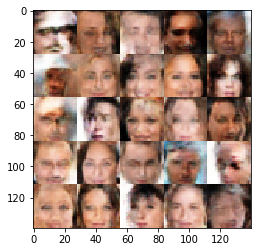

Epoch 1/1... Discriminator Loss: 0.9574... Generator Loss: 1.2505
Epoch 1/1... Discriminator Loss: 1.5239... Generator Loss: 0.4456
Epoch 1/1... Discriminator Loss: 1.5327... Generator Loss: 0.4356
Epoch 1/1... Discriminator Loss: 1.5028... Generator Loss: 0.4535
Epoch 1/1... Discriminator Loss: 1.4588... Generator Loss: 0.5475
Epoch 1/1... Discriminator Loss: 1.4905... Generator Loss: 0.5233
Epoch 1/1... Discriminator Loss: 1.2609... Generator Loss: 0.6426
Epoch 1/1... Discriminator Loss: 1.2703... Generator Loss: 0.7222
Epoch 1/1... Discriminator Loss: 1.3453... Generator Loss: 0.6039
Epoch 1/1... Discriminator Loss: 1.2017... Generator Loss: 0.7051


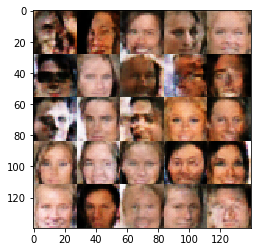

Epoch 1/1... Discriminator Loss: 1.3510... Generator Loss: 0.7826
Epoch 1/1... Discriminator Loss: 1.9076... Generator Loss: 0.4249
Epoch 1/1... Discriminator Loss: 1.2807... Generator Loss: 0.6806
Epoch 1/1... Discriminator Loss: 1.2530... Generator Loss: 0.7590
Epoch 1/1... Discriminator Loss: 1.3005... Generator Loss: 0.8728
Epoch 1/1... Discriminator Loss: 1.2565... Generator Loss: 0.7585
Epoch 1/1... Discriminator Loss: 1.3635... Generator Loss: 0.7903
Epoch 1/1... Discriminator Loss: 1.3104... Generator Loss: 0.5935
Epoch 1/1... Discriminator Loss: 1.2645... Generator Loss: 0.6289
Epoch 1/1... Discriminator Loss: 1.3969... Generator Loss: 0.6206


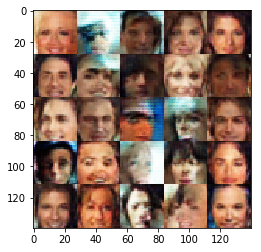

Epoch 1/1... Discriminator Loss: 1.3026... Generator Loss: 0.6087
Epoch 1/1... Discriminator Loss: 1.9034... Generator Loss: 0.3405
Epoch 1/1... Discriminator Loss: 1.2907... Generator Loss: 0.6233
Epoch 1/1... Discriminator Loss: 1.4543... Generator Loss: 0.4948
Epoch 1/1... Discriminator Loss: 1.4402... Generator Loss: 0.5750
Epoch 1/1... Discriminator Loss: 1.5203... Generator Loss: 0.4719
Epoch 1/1... Discriminator Loss: 1.1386... Generator Loss: 0.8604
Epoch 1/1... Discriminator Loss: 1.2872... Generator Loss: 0.5771
Epoch 1/1... Discriminator Loss: 1.2476... Generator Loss: 0.6901
Epoch 1/1... Discriminator Loss: 1.4660... Generator Loss: 0.4925


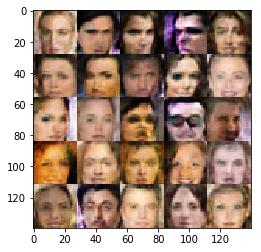

Epoch 1/1... Discriminator Loss: 1.0844... Generator Loss: 0.9123
Epoch 1/1... Discriminator Loss: 1.2069... Generator Loss: 0.9819
Epoch 1/1... Discriminator Loss: 1.1615... Generator Loss: 0.8473
Epoch 1/1... Discriminator Loss: 1.5163... Generator Loss: 0.4632
Epoch 1/1... Discriminator Loss: 0.9631... Generator Loss: 1.3111
Epoch 1/1... Discriminator Loss: 1.7297... Generator Loss: 0.3646
Epoch 1/1... Discriminator Loss: 1.4237... Generator Loss: 0.5276
Epoch 1/1... Discriminator Loss: 1.4311... Generator Loss: 0.6643
Epoch 1/1... Discriminator Loss: 1.6348... Generator Loss: 0.3921
Epoch 1/1... Discriminator Loss: 1.5748... Generator Loss: 0.4151


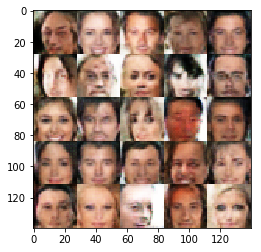

Epoch 1/1... Discriminator Loss: 1.1365... Generator Loss: 0.7794
Epoch 1/1... Discriminator Loss: 1.6694... Generator Loss: 0.3585
Epoch 1/1... Discriminator Loss: 1.0074... Generator Loss: 0.9319
Epoch 1/1... Discriminator Loss: 1.2087... Generator Loss: 0.8168
Epoch 1/1... Discriminator Loss: 1.2421... Generator Loss: 0.7804
Epoch 1/1... Discriminator Loss: 1.1928... Generator Loss: 0.7967
Epoch 1/1... Discriminator Loss: 1.2332... Generator Loss: 0.6709
Epoch 1/1... Discriminator Loss: 1.2786... Generator Loss: 0.6252
Epoch 1/1... Discriminator Loss: 1.4164... Generator Loss: 0.5492
Epoch 1/1... Discriminator Loss: 1.1247... Generator Loss: 1.3614


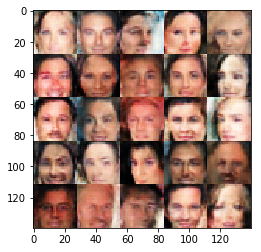

Epoch 1/1... Discriminator Loss: 1.0593... Generator Loss: 0.9288
Epoch 1/1... Discriminator Loss: 1.2992... Generator Loss: 0.6352
Epoch 1/1... Discriminator Loss: 1.4360... Generator Loss: 0.5116
Epoch 1/1... Discriminator Loss: 1.2978... Generator Loss: 0.7514
Epoch 1/1... Discriminator Loss: 1.2526... Generator Loss: 0.7863
Epoch 1/1... Discriminator Loss: 1.3017... Generator Loss: 0.5899
Epoch 1/1... Discriminator Loss: 1.6024... Generator Loss: 0.4008
Epoch 1/1... Discriminator Loss: 1.3064... Generator Loss: 0.6247
Epoch 1/1... Discriminator Loss: 1.2992... Generator Loss: 0.5949
Epoch 1/1... Discriminator Loss: 1.4028... Generator Loss: 0.5715


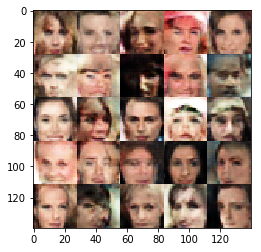

Epoch 1/1... Discriminator Loss: 1.3725... Generator Loss: 0.6988
Epoch 1/1... Discriminator Loss: 1.1225... Generator Loss: 0.8583
Epoch 1/1... Discriminator Loss: 1.1480... Generator Loss: 0.9537
Epoch 1/1... Discriminator Loss: 1.3649... Generator Loss: 0.5452
Epoch 1/1... Discriminator Loss: 1.4226... Generator Loss: 0.5072
Epoch 1/1... Discriminator Loss: 1.3831... Generator Loss: 0.6204
Epoch 1/1... Discriminator Loss: 1.1600... Generator Loss: 0.7083
Epoch 1/1... Discriminator Loss: 1.1601... Generator Loss: 0.9226
Epoch 1/1... Discriminator Loss: 1.3407... Generator Loss: 0.6790
Epoch 1/1... Discriminator Loss: 1.0681... Generator Loss: 0.9450


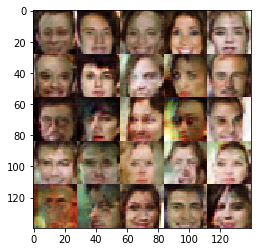

Epoch 1/1... Discriminator Loss: 1.1748... Generator Loss: 0.8122
Epoch 1/1... Discriminator Loss: 1.1083... Generator Loss: 0.7838
Epoch 1/1... Discriminator Loss: 1.0219... Generator Loss: 0.9684
Epoch 1/1... Discriminator Loss: 1.2470... Generator Loss: 0.8720
Epoch 1/1... Discriminator Loss: 1.1175... Generator Loss: 0.8579
Epoch 1/1... Discriminator Loss: 1.2422... Generator Loss: 0.8041
Epoch 1/1... Discriminator Loss: 1.1318... Generator Loss: 0.7814
Epoch 1/1... Discriminator Loss: 1.1458... Generator Loss: 0.8792
Epoch 1/1... Discriminator Loss: 1.0030... Generator Loss: 0.9807
Epoch 1/1... Discriminator Loss: 1.2567... Generator Loss: 0.6907


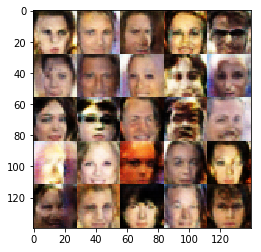

Epoch 1/1... Discriminator Loss: 1.6362... Generator Loss: 0.3789
Epoch 1/1... Discriminator Loss: 1.5190... Generator Loss: 0.4826
Epoch 1/1... Discriminator Loss: 1.1047... Generator Loss: 0.9122
Epoch 1/1... Discriminator Loss: 1.3145... Generator Loss: 0.6652
Epoch 1/1... Discriminator Loss: 1.1793... Generator Loss: 0.7181
Epoch 1/1... Discriminator Loss: 1.2647... Generator Loss: 0.6087
Epoch 1/1... Discriminator Loss: 1.2987... Generator Loss: 0.6205
Epoch 1/1... Discriminator Loss: 0.9499... Generator Loss: 1.0083
Epoch 1/1... Discriminator Loss: 1.1795... Generator Loss: 0.7045
Epoch 1/1... Discriminator Loss: 1.3369... Generator Loss: 0.8450


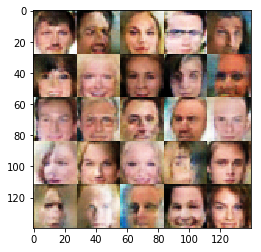

Epoch 1/1... Discriminator Loss: 1.4076... Generator Loss: 0.5168
Epoch 1/1... Discriminator Loss: 1.5594... Generator Loss: 0.4248
Epoch 1/1... Discriminator Loss: 1.0892... Generator Loss: 1.1719
Epoch 1/1... Discriminator Loss: 1.3282... Generator Loss: 0.6155
Epoch 1/1... Discriminator Loss: 1.3865... Generator Loss: 0.5283
Epoch 1/1... Discriminator Loss: 1.1519... Generator Loss: 0.8661
Epoch 1/1... Discriminator Loss: 1.8199... Generator Loss: 0.4150
Epoch 1/1... Discriminator Loss: 1.4921... Generator Loss: 2.1403
Epoch 1/1... Discriminator Loss: 1.8388... Generator Loss: 0.3181
Epoch 1/1... Discriminator Loss: 1.4921... Generator Loss: 0.4716


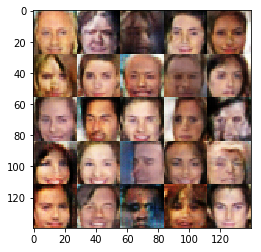

Epoch 1/1... Discriminator Loss: 1.1592... Generator Loss: 0.7915
Epoch 1/1... Discriminator Loss: 1.2735... Generator Loss: 0.6945
Epoch 1/1... Discriminator Loss: 1.3077... Generator Loss: 0.7583
Epoch 1/1... Discriminator Loss: 1.2330... Generator Loss: 0.6935
Epoch 1/1... Discriminator Loss: 1.3231... Generator Loss: 0.5506
Epoch 1/1... Discriminator Loss: 1.1935... Generator Loss: 0.8769
Epoch 1/1... Discriminator Loss: 1.5726... Generator Loss: 0.5359
Epoch 1/1... Discriminator Loss: 1.4488... Generator Loss: 0.4747
Epoch 1/1... Discriminator Loss: 1.4768... Generator Loss: 0.5218
Epoch 1/1... Discriminator Loss: 1.5307... Generator Loss: 0.4472


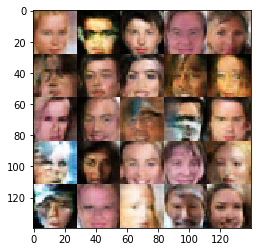

Epoch 1/1... Discriminator Loss: 0.9910... Generator Loss: 0.8775
Epoch 1/1... Discriminator Loss: 1.1892... Generator Loss: 0.7558
Epoch 1/1... Discriminator Loss: 1.7712... Generator Loss: 0.4105
Epoch 1/1... Discriminator Loss: 1.1923... Generator Loss: 0.7601
Epoch 1/1... Discriminator Loss: 1.3656... Generator Loss: 0.5557
Epoch 1/1... Discriminator Loss: 1.2634... Generator Loss: 0.7259
Epoch 1/1... Discriminator Loss: 1.6841... Generator Loss: 0.3644
Epoch 1/1... Discriminator Loss: 1.1869... Generator Loss: 0.8681
Epoch 1/1... Discriminator Loss: 1.3070... Generator Loss: 0.5304
Epoch 1/1... Discriminator Loss: 0.9693... Generator Loss: 1.2971


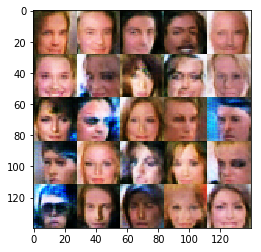

Epoch 1/1... Discriminator Loss: 1.5542... Generator Loss: 0.4670
Epoch 1/1... Discriminator Loss: 1.3363... Generator Loss: 1.1191
Epoch 1/1... Discriminator Loss: 1.3162... Generator Loss: 0.6521
Epoch 1/1... Discriminator Loss: 1.2797... Generator Loss: 0.6195
Epoch 1/1... Discriminator Loss: 1.5467... Generator Loss: 0.4664
Epoch 1/1... Discriminator Loss: 1.2358... Generator Loss: 0.6449
Epoch 1/1... Discriminator Loss: 1.6586... Generator Loss: 0.5548
Epoch 1/1... Discriminator Loss: 1.3435... Generator Loss: 0.6825
Epoch 1/1... Discriminator Loss: 1.0806... Generator Loss: 0.7730
Epoch 1/1... Discriminator Loss: 1.2141... Generator Loss: 0.8364


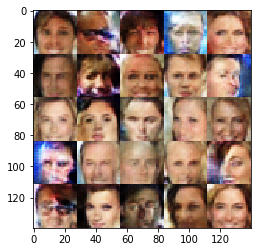

Epoch 1/1... Discriminator Loss: 1.1886... Generator Loss: 0.8625
Epoch 1/1... Discriminator Loss: 1.1059... Generator Loss: 0.9954
Epoch 1/1... Discriminator Loss: 1.2986... Generator Loss: 0.7293
Epoch 1/1... Discriminator Loss: 1.1757... Generator Loss: 0.7583
Epoch 1/1... Discriminator Loss: 1.2677... Generator Loss: 0.6038
Epoch 1/1... Discriminator Loss: 1.4589... Generator Loss: 0.5634
Epoch 1/1... Discriminator Loss: 1.0886... Generator Loss: 0.9063
Epoch 1/1... Discriminator Loss: 0.9587... Generator Loss: 0.8888
Epoch 1/1... Discriminator Loss: 1.3252... Generator Loss: 0.6499
Epoch 1/1... Discriminator Loss: 1.2275... Generator Loss: 0.6181


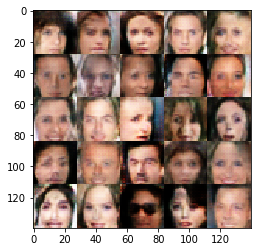

Epoch 1/1... Discriminator Loss: 1.6326... Generator Loss: 0.3940
Epoch 1/1... Discriminator Loss: 1.3197... Generator Loss: 0.5890
Epoch 1/1... Discriminator Loss: 1.2514... Generator Loss: 0.6356
Epoch 1/1... Discriminator Loss: 1.0520... Generator Loss: 0.8737
Epoch 1/1... Discriminator Loss: 1.3481... Generator Loss: 0.6049
Epoch 1/1... Discriminator Loss: 1.2816... Generator Loss: 0.8453
Epoch 1/1... Discriminator Loss: 1.0615... Generator Loss: 0.9541
Epoch 1/1... Discriminator Loss: 1.4810... Generator Loss: 0.4851
Epoch 1/1... Discriminator Loss: 1.2238... Generator Loss: 0.7080
Epoch 1/1... Discriminator Loss: 0.9533... Generator Loss: 1.2101


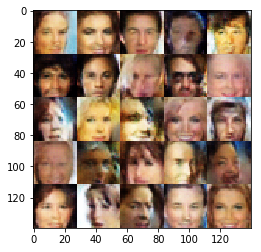

Epoch 1/1... Discriminator Loss: 1.4950... Generator Loss: 0.4537
Epoch 1/1... Discriminator Loss: 1.2602... Generator Loss: 0.7415
Epoch 1/1... Discriminator Loss: 1.3889... Generator Loss: 0.6682
Epoch 1/1... Discriminator Loss: 1.3125... Generator Loss: 0.8399
Epoch 1/1... Discriminator Loss: 1.2190... Generator Loss: 0.8691
Epoch 1/1... Discriminator Loss: 1.2089... Generator Loss: 0.6610
Epoch 1/1... Discriminator Loss: 1.5854... Generator Loss: 0.4239
Epoch 1/1... Discriminator Loss: 1.3972... Generator Loss: 0.5305
Epoch 1/1... Discriminator Loss: 1.0283... Generator Loss: 0.9122
Epoch 1/1... Discriminator Loss: 1.0936... Generator Loss: 1.0608


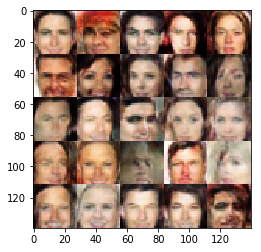

Epoch 1/1... Discriminator Loss: 1.2942... Generator Loss: 0.6840
Epoch 1/1... Discriminator Loss: 1.2922... Generator Loss: 0.6519
Epoch 1/1... Discriminator Loss: 1.3352... Generator Loss: 0.6897
Epoch 1/1... Discriminator Loss: 1.2193... Generator Loss: 0.6480
Epoch 1/1... Discriminator Loss: 1.1979... Generator Loss: 0.6722
Epoch 1/1... Discriminator Loss: 1.3407... Generator Loss: 0.6645
Epoch 1/1... Discriminator Loss: 1.3977... Generator Loss: 0.5514
Epoch 1/1... Discriminator Loss: 1.4355... Generator Loss: 0.5771
Epoch 1/1... Discriminator Loss: 1.1425... Generator Loss: 0.8704
Epoch 1/1... Discriminator Loss: 1.1069... Generator Loss: 0.8741


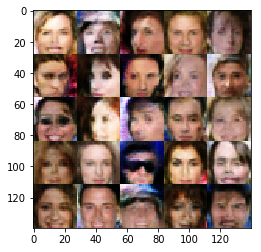

Epoch 1/1... Discriminator Loss: 1.4162... Generator Loss: 0.6289
Epoch 1/1... Discriminator Loss: 1.4310... Generator Loss: 0.5100
Epoch 1/1... Discriminator Loss: 1.2670... Generator Loss: 0.7246
Epoch 1/1... Discriminator Loss: 1.3067... Generator Loss: 0.6236
Epoch 1/1... Discriminator Loss: 1.6298... Generator Loss: 0.4705
Epoch 1/1... Discriminator Loss: 1.3052... Generator Loss: 0.6650
Epoch 1/1... Discriminator Loss: 1.1290... Generator Loss: 1.0915
Epoch 1/1... Discriminator Loss: 1.4125... Generator Loss: 0.5090
Epoch 1/1... Discriminator Loss: 1.5270... Generator Loss: 0.4696
Epoch 1/1... Discriminator Loss: 1.2803... Generator Loss: 0.7528


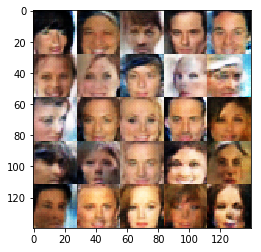

Epoch 1/1... Discriminator Loss: 1.8799... Generator Loss: 0.3392
Epoch 1/1... Discriminator Loss: 1.4040... Generator Loss: 0.5453
Epoch 1/1... Discriminator Loss: 1.3293... Generator Loss: 0.7318
Epoch 1/1... Discriminator Loss: 1.4105... Generator Loss: 0.5617
Epoch 1/1... Discriminator Loss: 1.4915... Generator Loss: 0.4572
Epoch 1/1... Discriminator Loss: 1.1234... Generator Loss: 0.8491
Epoch 1/1... Discriminator Loss: 1.4201... Generator Loss: 0.5343
Epoch 1/1... Discriminator Loss: 1.1211... Generator Loss: 1.0305
Epoch 1/1... Discriminator Loss: 1.1302... Generator Loss: 0.8784
Epoch 1/1... Discriminator Loss: 1.0615... Generator Loss: 0.8394


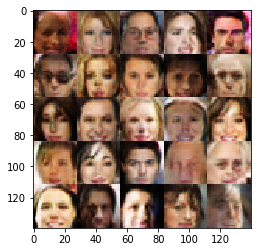

Epoch 1/1... Discriminator Loss: 1.1794... Generator Loss: 0.8253
Epoch 1/1... Discriminator Loss: 1.3516... Generator Loss: 0.6168
Epoch 1/1... Discriminator Loss: 1.3388... Generator Loss: 0.5513
Epoch 1/1... Discriminator Loss: 1.3964... Generator Loss: 0.5259
Epoch 1/1... Discriminator Loss: 1.2748... Generator Loss: 0.6496
Epoch 1/1... Discriminator Loss: 1.2426... Generator Loss: 0.7849
Epoch 1/1... Discriminator Loss: 1.6361... Generator Loss: 0.4366
Epoch 1/1... Discriminator Loss: 1.4547... Generator Loss: 0.4771
Epoch 1/1... Discriminator Loss: 1.2234... Generator Loss: 0.6856
Epoch 1/1... Discriminator Loss: 1.2034... Generator Loss: 0.6975


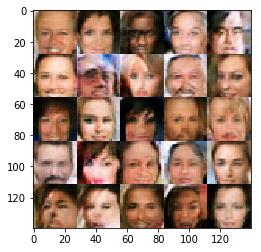

Epoch 1/1... Discriminator Loss: 1.4653... Generator Loss: 0.4918
Epoch 1/1... Discriminator Loss: 1.2587... Generator Loss: 0.8011
Epoch 1/1... Discriminator Loss: 1.3947... Generator Loss: 0.8140
Epoch 1/1... Discriminator Loss: 1.0260... Generator Loss: 1.1798
Epoch 1/1... Discriminator Loss: 1.1886... Generator Loss: 0.7496
Epoch 1/1... Discriminator Loss: 1.3049... Generator Loss: 0.6978
Epoch 1/1... Discriminator Loss: 1.2825... Generator Loss: 0.7256
Epoch 1/1... Discriminator Loss: 1.2896... Generator Loss: 0.6862
Epoch 1/1... Discriminator Loss: 1.1982... Generator Loss: 0.8202
Epoch 1/1... Discriminator Loss: 1.4238... Generator Loss: 0.4833


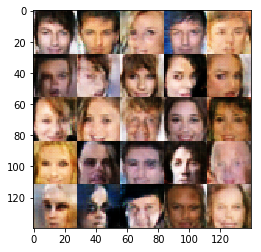

Epoch 1/1... Discriminator Loss: 1.2565... Generator Loss: 0.7182
Epoch 1/1... Discriminator Loss: 1.4713... Generator Loss: 0.4774
Epoch 1/1... Discriminator Loss: 1.2346... Generator Loss: 0.8610
Epoch 1/1... Discriminator Loss: 1.7451... Generator Loss: 0.3591
Epoch 1/1... Discriminator Loss: 1.2590... Generator Loss: 0.6471
Epoch 1/1... Discriminator Loss: 1.3899... Generator Loss: 0.5387
Epoch 1/1... Discriminator Loss: 1.3282... Generator Loss: 0.7776
Epoch 1/1... Discriminator Loss: 1.3431... Generator Loss: 0.5639
Epoch 1/1... Discriminator Loss: 1.3789... Generator Loss: 0.5475
Epoch 1/1... Discriminator Loss: 1.3340... Generator Loss: 0.6499


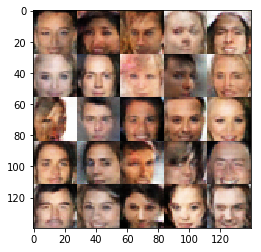

Epoch 1/1... Discriminator Loss: 1.3571... Generator Loss: 0.5482
Epoch 1/1... Discriminator Loss: 1.1196... Generator Loss: 0.8816
Epoch 1/1... Discriminator Loss: 1.1858... Generator Loss: 0.8447
Epoch 1/1... Discriminator Loss: 0.8524... Generator Loss: 1.2465
Epoch 1/1... Discriminator Loss: 1.2337... Generator Loss: 0.6403
Epoch 1/1... Discriminator Loss: 1.3848... Generator Loss: 0.5712
Epoch 1/1... Discriminator Loss: 1.4801... Generator Loss: 0.4941
Epoch 1/1... Discriminator Loss: 1.2893... Generator Loss: 0.5532
Epoch 1/1... Discriminator Loss: 1.3502... Generator Loss: 0.6337
Epoch 1/1... Discriminator Loss: 1.3775... Generator Loss: 0.5995


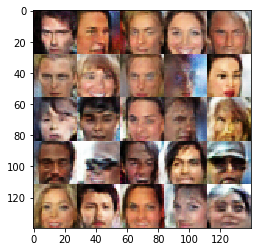

Epoch 1/1... Discriminator Loss: 1.1694... Generator Loss: 0.8669
Epoch 1/1... Discriminator Loss: 1.2145... Generator Loss: 0.7049
Epoch 1/1... Discriminator Loss: 1.2628... Generator Loss: 0.6101
Epoch 1/1... Discriminator Loss: 1.4664... Generator Loss: 0.5133
Epoch 1/1... Discriminator Loss: 1.3180... Generator Loss: 0.5942
Epoch 1/1... Discriminator Loss: 1.4276... Generator Loss: 0.5251
Epoch 1/1... Discriminator Loss: 0.7799... Generator Loss: 1.4703
Epoch 1/1... Discriminator Loss: 0.9642... Generator Loss: 1.0287
Epoch 1/1... Discriminator Loss: 1.2594... Generator Loss: 0.7442
Epoch 1/1... Discriminator Loss: 0.9981... Generator Loss: 1.0540


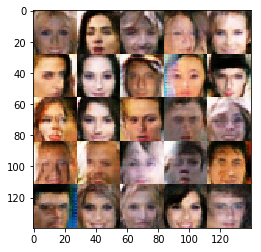

Epoch 1/1... Discriminator Loss: 1.1462... Generator Loss: 0.8302
Epoch 1/1... Discriminator Loss: 1.5216... Generator Loss: 0.5693
Epoch 1/1... Discriminator Loss: 1.4707... Generator Loss: 0.4690
Epoch 1/1... Discriminator Loss: 1.4655... Generator Loss: 0.5226
Epoch 1/1... Discriminator Loss: 1.3474... Generator Loss: 0.6434
Epoch 1/1... Discriminator Loss: 1.1761... Generator Loss: 0.7931
Epoch 1/1... Discriminator Loss: 1.2759... Generator Loss: 0.6553
Epoch 1/1... Discriminator Loss: 1.5833... Generator Loss: 0.3882
Epoch 1/1... Discriminator Loss: 1.5717... Generator Loss: 0.4603
Epoch 1/1... Discriminator Loss: 1.3236... Generator Loss: 0.5753


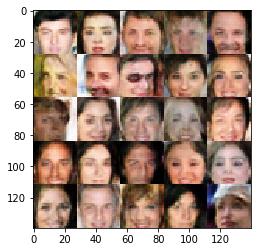

Epoch 1/1... Discriminator Loss: 1.4621... Generator Loss: 0.5193
Epoch 1/1... Discriminator Loss: 1.5535... Generator Loss: 0.4349
Epoch 1/1... Discriminator Loss: 1.2819... Generator Loss: 0.5675
Epoch 1/1... Discriminator Loss: 1.4018... Generator Loss: 0.5202
Epoch 1/1... Discriminator Loss: 1.0617... Generator Loss: 0.9064
Epoch 1/1... Discriminator Loss: 1.6587... Generator Loss: 0.4628
Epoch 1/1... Discriminator Loss: 1.0373... Generator Loss: 0.9541
Epoch 1/1... Discriminator Loss: 1.2380... Generator Loss: 0.6724
Epoch 1/1... Discriminator Loss: 1.3888... Generator Loss: 0.5344
Epoch 1/1... Discriminator Loss: 1.0607... Generator Loss: 0.8695


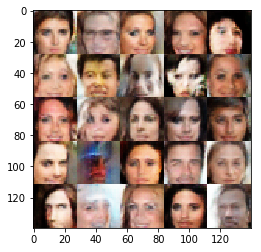

Epoch 1/1... Discriminator Loss: 1.1745... Generator Loss: 0.7574
Epoch 1/1... Discriminator Loss: 1.1754... Generator Loss: 0.9171
Epoch 1/1... Discriminator Loss: 1.1336... Generator Loss: 0.7091
Epoch 1/1... Discriminator Loss: 1.4449... Generator Loss: 0.4976
Epoch 1/1... Discriminator Loss: 0.9438... Generator Loss: 1.1263
Epoch 1/1... Discriminator Loss: 1.8642... Generator Loss: 0.2906
Epoch 1/1... Discriminator Loss: 1.1781... Generator Loss: 0.7068
Epoch 1/1... Discriminator Loss: 1.4304... Generator Loss: 0.4785
Epoch 1/1... Discriminator Loss: 1.1296... Generator Loss: 0.7579
Epoch 1/1... Discriminator Loss: 1.3128... Generator Loss: 0.5812


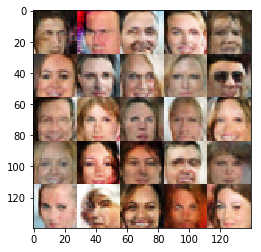

Epoch 1/1... Discriminator Loss: 1.2549... Generator Loss: 0.7129
Epoch 1/1... Discriminator Loss: 1.6407... Generator Loss: 0.4204
Epoch 1/1... Discriminator Loss: 1.0993... Generator Loss: 0.7912
Epoch 1/1... Discriminator Loss: 1.1946... Generator Loss: 0.8314
Epoch 1/1... Discriminator Loss: 1.4307... Generator Loss: 0.5487
Epoch 1/1... Discriminator Loss: 0.7949... Generator Loss: 1.1562
Epoch 1/1... Discriminator Loss: 1.3552... Generator Loss: 0.6239
Epoch 1/1... Discriminator Loss: 1.2330... Generator Loss: 0.6651
Epoch 1/1... Discriminator Loss: 1.5652... Generator Loss: 0.4482
Epoch 1/1... Discriminator Loss: 1.4016... Generator Loss: 0.5083


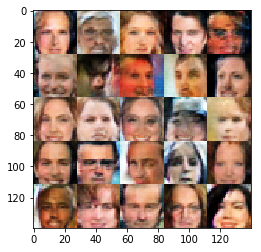

Epoch 1/1... Discriminator Loss: 1.4831... Generator Loss: 0.4396
Epoch 1/1... Discriminator Loss: 1.6839... Generator Loss: 0.3369
Epoch 1/1... Discriminator Loss: 1.6626... Generator Loss: 0.3701
Epoch 1/1... Discriminator Loss: 1.1605... Generator Loss: 1.0534
Epoch 1/1... Discriminator Loss: 1.1293... Generator Loss: 0.7351
Epoch 1/1... Discriminator Loss: 1.1675... Generator Loss: 0.8066
Epoch 1/1... Discriminator Loss: 0.9412... Generator Loss: 1.2243
Epoch 1/1... Discriminator Loss: 1.1950... Generator Loss: 0.6738
Epoch 1/1... Discriminator Loss: 1.4964... Generator Loss: 0.4836
Epoch 1/1... Discriminator Loss: 1.5925... Generator Loss: 0.5047


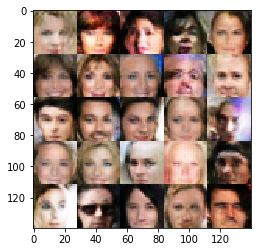

Epoch 1/1... Discriminator Loss: 1.3690... Generator Loss: 0.5687
Epoch 1/1... Discriminator Loss: 1.1448... Generator Loss: 0.9078
Epoch 1/1... Discriminator Loss: 1.2407... Generator Loss: 0.6878
Epoch 1/1... Discriminator Loss: 1.3068... Generator Loss: 0.6302
Epoch 1/1... Discriminator Loss: 1.2438... Generator Loss: 0.7655
Epoch 1/1... Discriminator Loss: 1.2046... Generator Loss: 0.6688
Epoch 1/1... Discriminator Loss: 1.4684... Generator Loss: 0.4918
Epoch 1/1... Discriminator Loss: 1.1046... Generator Loss: 0.9047
Epoch 1/1... Discriminator Loss: 1.1550... Generator Loss: 0.8217
Epoch 1/1... Discriminator Loss: 1.2329... Generator Loss: 0.6317


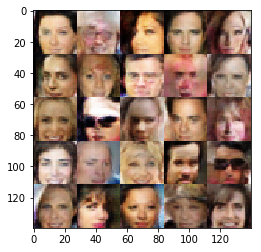

Epoch 1/1... Discriminator Loss: 1.2152... Generator Loss: 0.7002
Epoch 1/1... Discriminator Loss: 1.2784... Generator Loss: 0.6849
Epoch 1/1... Discriminator Loss: 1.4641... Generator Loss: 0.4301
Epoch 1/1... Discriminator Loss: 0.9834... Generator Loss: 1.0323
Epoch 1/1... Discriminator Loss: 1.2391... Generator Loss: 0.6442
Epoch 1/1... Discriminator Loss: 1.5890... Generator Loss: 0.4283
Epoch 1/1... Discriminator Loss: 1.1469... Generator Loss: 0.7450
Epoch 1/1... Discriminator Loss: 1.4773... Generator Loss: 0.4651
Epoch 1/1... Discriminator Loss: 1.5776... Generator Loss: 0.4390
Epoch 1/1... Discriminator Loss: 1.2649... Generator Loss: 0.7273


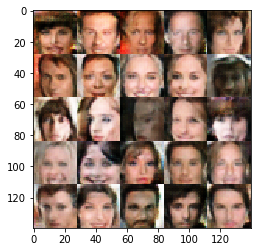

Epoch 1/1... Discriminator Loss: 1.4111... Generator Loss: 0.5726
Epoch 1/1... Discriminator Loss: 0.9860... Generator Loss: 0.9276
Epoch 1/1... Discriminator Loss: 1.5665... Generator Loss: 0.4078
Epoch 1/1... Discriminator Loss: 1.2891... Generator Loss: 0.5968
Epoch 1/1... Discriminator Loss: 1.4913... Generator Loss: 0.5198
Epoch 1/1... Discriminator Loss: 1.2903... Generator Loss: 0.6199
Epoch 1/1... Discriminator Loss: 1.0538... Generator Loss: 0.9145
Epoch 1/1... Discriminator Loss: 1.3882... Generator Loss: 0.5189
Epoch 1/1... Discriminator Loss: 1.1326... Generator Loss: 1.0709
Epoch 1/1... Discriminator Loss: 1.1637... Generator Loss: 0.7358


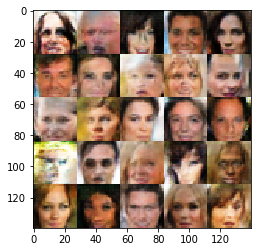

Epoch 1/1... Discriminator Loss: 1.3475... Generator Loss: 0.5393
Epoch 1/1... Discriminator Loss: 1.1621... Generator Loss: 1.0239
Epoch 1/1... Discriminator Loss: 1.2456... Generator Loss: 0.7735
Epoch 1/1... Discriminator Loss: 1.2592... Generator Loss: 0.6882
Epoch 1/1... Discriminator Loss: 1.1738... Generator Loss: 0.7481
Epoch 1/1... Discriminator Loss: 1.1802... Generator Loss: 0.7257
Epoch 1/1... Discriminator Loss: 1.0581... Generator Loss: 0.7795
Epoch 1/1... Discriminator Loss: 1.6341... Generator Loss: 0.4496
Epoch 1/1... Discriminator Loss: 1.1568... Generator Loss: 0.7405
Epoch 1/1... Discriminator Loss: 1.5305... Generator Loss: 0.4620


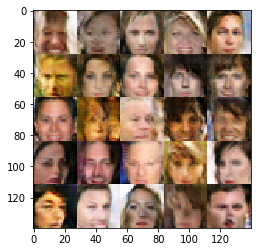

Epoch 1/1... Discriminator Loss: 1.1541... Generator Loss: 0.7455
Epoch 1/1... Discriminator Loss: 1.2318... Generator Loss: 0.6841
Epoch 1/1... Discriminator Loss: 1.9534... Generator Loss: 0.2580
Epoch 1/1... Discriminator Loss: 1.5480... Generator Loss: 0.6245
Epoch 1/1... Discriminator Loss: 1.2157... Generator Loss: 0.6033
Epoch 1/1... Discriminator Loss: 1.0781... Generator Loss: 1.0091
Epoch 1/1... Discriminator Loss: 0.8458... Generator Loss: 1.3641
Epoch 1/1... Discriminator Loss: 1.3697... Generator Loss: 0.5205
Epoch 1/1... Discriminator Loss: 0.9992... Generator Loss: 0.9907
Epoch 1/1... Discriminator Loss: 1.8274... Generator Loss: 0.3102


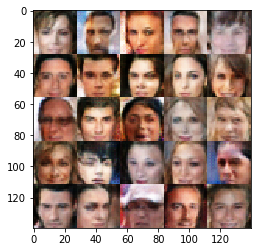

Epoch 1/1... Discriminator Loss: 1.3033... Generator Loss: 0.7516
Epoch 1/1... Discriminator Loss: 1.5570... Generator Loss: 0.3937
Epoch 1/1... Discriminator Loss: 1.5162... Generator Loss: 0.5145
Epoch 1/1... Discriminator Loss: 1.1917... Generator Loss: 0.8657
Epoch 1/1... Discriminator Loss: 1.1971... Generator Loss: 0.7807
Epoch 1/1... Discriminator Loss: 0.9840... Generator Loss: 0.8677
Epoch 1/1... Discriminator Loss: 1.1561... Generator Loss: 0.6809
Epoch 1/1... Discriminator Loss: 1.3819... Generator Loss: 0.6168
Epoch 1/1... Discriminator Loss: 1.1162... Generator Loss: 0.7789
Epoch 1/1... Discriminator Loss: 1.3104... Generator Loss: 0.7267


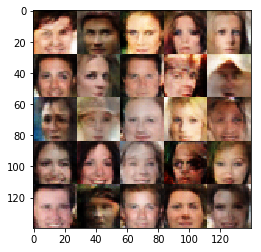

Epoch 1/1... Discriminator Loss: 1.4364... Generator Loss: 0.4765
Epoch 1/1... Discriminator Loss: 0.9689... Generator Loss: 0.9507
Epoch 1/1... Discriminator Loss: 1.9855... Generator Loss: 0.2526
Epoch 1/1... Discriminator Loss: 1.2785... Generator Loss: 0.6291
Epoch 1/1... Discriminator Loss: 1.4931... Generator Loss: 0.6146
Epoch 1/1... Discriminator Loss: 1.2954... Generator Loss: 0.7605
Epoch 1/1... Discriminator Loss: 1.4056... Generator Loss: 0.5406
Epoch 1/1... Discriminator Loss: 1.3466... Generator Loss: 0.5989
Epoch 1/1... Discriminator Loss: 1.5138... Generator Loss: 0.4734
Epoch 1/1... Discriminator Loss: 1.5330... Generator Loss: 0.4313


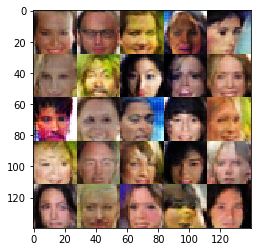

Epoch 1/1... Discriminator Loss: 1.6751... Generator Loss: 0.3907
Epoch 1/1... Discriminator Loss: 1.2422... Generator Loss: 0.7844
Epoch 1/1... Discriminator Loss: 1.2767... Generator Loss: 0.7023
Epoch 1/1... Discriminator Loss: 1.2813... Generator Loss: 0.7333
Epoch 1/1... Discriminator Loss: 1.5823... Generator Loss: 0.4098
Epoch 1/1... Discriminator Loss: 1.3119... Generator Loss: 0.5696
Epoch 1/1... Discriminator Loss: 1.2419... Generator Loss: 0.6556
Epoch 1/1... Discriminator Loss: 1.2282... Generator Loss: 0.7491
Epoch 1/1... Discriminator Loss: 1.2379... Generator Loss: 0.7433
Epoch 1/1... Discriminator Loss: 1.0859... Generator Loss: 0.9663


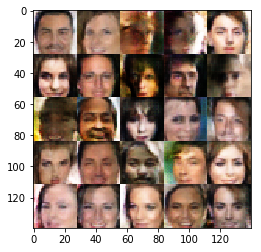

Epoch 1/1... Discriminator Loss: 1.1292... Generator Loss: 1.1714
Epoch 1/1... Discriminator Loss: 1.5601... Generator Loss: 0.4485
Epoch 1/1... Discriminator Loss: 0.9462... Generator Loss: 0.9017
Epoch 1/1... Discriminator Loss: 0.9722... Generator Loss: 0.8660
Epoch 1/1... Discriminator Loss: 1.7125... Generator Loss: 0.3397
Epoch 1/1... Discriminator Loss: 1.5967... Generator Loss: 0.4849
Epoch 1/1... Discriminator Loss: 1.4332... Generator Loss: 0.5932
Epoch 1/1... Discriminator Loss: 1.5522... Generator Loss: 0.4674
Epoch 1/1... Discriminator Loss: 1.5200... Generator Loss: 0.4706
Epoch 1/1... Discriminator Loss: 1.6000... Generator Loss: 0.4172


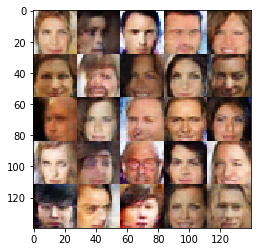

Epoch 1/1... Discriminator Loss: 1.4858... Generator Loss: 0.4965
Epoch 1/1... Discriminator Loss: 0.9458... Generator Loss: 1.0921
Epoch 1/1... Discriminator Loss: 0.7817... Generator Loss: 1.1930
Epoch 1/1... Discriminator Loss: 1.4347... Generator Loss: 0.5103
Epoch 1/1... Discriminator Loss: 1.2714... Generator Loss: 0.6930
Epoch 1/1... Discriminator Loss: 1.8322... Generator Loss: 0.3128
Epoch 1/1... Discriminator Loss: 1.0740... Generator Loss: 0.7997
Epoch 1/1... Discriminator Loss: 1.4648... Generator Loss: 0.4403
Epoch 1/1... Discriminator Loss: 1.1612... Generator Loss: 0.7429
Epoch 1/1... Discriminator Loss: 0.9781... Generator Loss: 1.1565


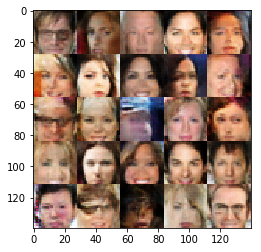

Epoch 1/1... Discriminator Loss: 1.4270... Generator Loss: 0.4880
Epoch 1/1... Discriminator Loss: 0.9405... Generator Loss: 1.0050
Epoch 1/1... Discriminator Loss: 1.0406... Generator Loss: 0.8912
Epoch 1/1... Discriminator Loss: 1.4122... Generator Loss: 0.6046
Epoch 1/1... Discriminator Loss: 0.9812... Generator Loss: 0.9870
Epoch 1/1... Discriminator Loss: 1.0817... Generator Loss: 0.8678
Epoch 1/1... Discriminator Loss: 1.0332... Generator Loss: 0.8744
Epoch 1/1... Discriminator Loss: 1.1475... Generator Loss: 0.7426
Epoch 1/1... Discriminator Loss: 1.5071... Generator Loss: 0.4426
Epoch 1/1... Discriminator Loss: 1.9063... Generator Loss: 0.2940


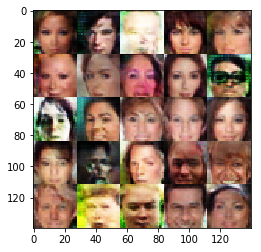

Epoch 1/1... Discriminator Loss: 1.7118... Generator Loss: 0.4188
Epoch 1/1... Discriminator Loss: 1.7708... Generator Loss: 0.3433
Epoch 1/1... Discriminator Loss: 1.5166... Generator Loss: 0.5000
Epoch 1/1... Discriminator Loss: 1.2099... Generator Loss: 0.6048
Epoch 1/1... Discriminator Loss: 1.0941... Generator Loss: 1.1200
Epoch 1/1... Discriminator Loss: 1.5877... Generator Loss: 0.4313
Epoch 1/1... Discriminator Loss: 1.4417... Generator Loss: 0.4903
Epoch 1/1... Discriminator Loss: 1.5946... Generator Loss: 0.4089
Epoch 1/1... Discriminator Loss: 1.6532... Generator Loss: 0.4238
Epoch 1/1... Discriminator Loss: 1.1881... Generator Loss: 0.6630


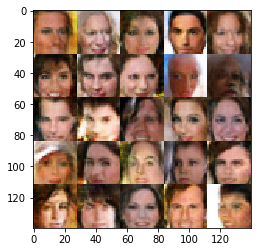

Epoch 1/1... Discriminator Loss: 1.0855... Generator Loss: 0.7439
Epoch 1/1... Discriminator Loss: 1.2162... Generator Loss: 0.7911
Epoch 1/1... Discriminator Loss: 1.4335... Generator Loss: 0.5392


In [30]:
batch_size = 32
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.